In [1]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

In [2]:
# File to Load 
sum_table = "EPL_all_seasons_sum.csv"
matches_table = "EPL_all_seasons_matches.csv"

# Read csv files and store into Pandas DataFrames
sum_df = pd.read_csv(sum_table)
matches_df = pd.read_csv(matches_table)

In [3]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1900 entries, 0 to 1899
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1900 non-null   int64  
 1   Season       1900 non-null   object 
 2   Wk           1900 non-null   float64
 3   Date         1900 non-null   object 
 4   Time         1900 non-null   object 
 5   Home         1900 non-null   object 
 6   Away         1900 non-null   object 
 7   Home Score   1900 non-null   int64  
 8   Away Score   1900 non-null   int64  
 9   xG Home      1900 non-null   float64
 10  xG Away      1900 non-null   float64
 11  Attendance   1460 non-null   float64
 12  Venue        1900 non-null   object 
 13  Referee      1900 non-null   object 
 14  xG Diff      1900 non-null   float64
 15  Actual Diff  1900 non-null   float64
dtypes: float64(6), int64(3), object(7)
memory usage: 237.6+ KB


In [4]:
# Get matches where fans were present
attendance_df = matches_df.loc[matches_df["Attendance"] > 1, :]
attendance_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1899
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1460 non-null   int64  
 1   Season       1460 non-null   object 
 2   Wk           1460 non-null   float64
 3   Date         1460 non-null   object 
 4   Time         1460 non-null   object 
 5   Home         1460 non-null   object 
 6   Away         1460 non-null   object 
 7   Home Score   1460 non-null   int64  
 8   Away Score   1460 non-null   int64  
 9   xG Home      1460 non-null   float64
 10  xG Away      1460 non-null   float64
 11  Attendance   1460 non-null   float64
 12  Venue        1460 non-null   object 
 13  Referee      1460 non-null   object 
 14  xG Diff      1460 non-null   float64
 15  Actual Diff  1460 non-null   float64
dtypes: float64(6), int64(3), object(7)
memory usage: 193.9+ KB


In [5]:
# Get matches where home team won
home_wins_df = attendance_df.loc[attendance_df["Home Score"] > attendance_df["Away Score"], :]
len(home_wins_df)

663

In [6]:
# Get matches where away team won
away_wins_df = attendance_df.loc[attendance_df["Home Score"] < attendance_df["Away Score"], :]
len(away_wins_df)

463

In [7]:
# Get matches that ended in a draw
draws_df = attendance_df.loc[attendance_df["Home Score"] == attendance_df["Away Score"], :]
len(draws_df)

334

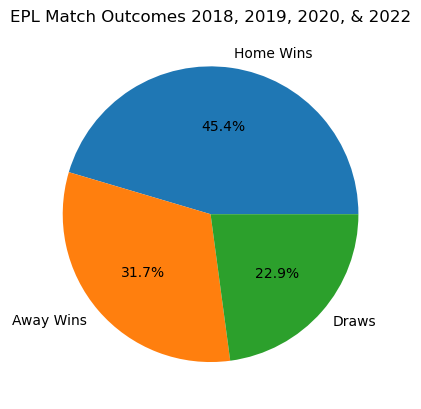

In [8]:
# Calculate % occurance of win/loss/draw
home_win_pct = (663/1460)
away_win_pct = (463/1460)
draw_pct = (334/1460)

# Generate pie chart to display results
labels =  ['Home Wins', 'Away Wins', 'Draws']
values = home_win_pct, away_win_pct, draw_pct 

plt.title("EPL Match Outcomes 2018, 2019, 2020, & 2022")
plt.pie(values, labels=labels ,autopct='%1.1f%%')
plt.show()

In [9]:
# Get matches where attendance was 0 
covid_season_df = matches_df.loc[matches_df["Season"] == '2020-2021', :]
covid_season_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380 entries, 1140 to 1519
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   380 non-null    int64  
 1   Season       380 non-null    object 
 2   Wk           380 non-null    float64
 3   Date         380 non-null    object 
 4   Time         380 non-null    object 
 5   Home         380 non-null    object 
 6   Away         380 non-null    object 
 7   Home Score   380 non-null    int64  
 8   Away Score   380 non-null    int64  
 9   xG Home      380 non-null    float64
 10  xG Away      380 non-null    float64
 11  Attendance   32 non-null     float64
 12  Venue        380 non-null    object 
 13  Referee      380 non-null    object 
 14  xG Diff      380 non-null    float64
 15  Actual Diff  380 non-null    float64
dtypes: float64(6), int64(3), object(7)
memory usage: 50.5+ KB


In [10]:
# Get matches where home team won during 2020-2021 season
home_wins_21_df = covid_season_df.loc[covid_season_df["Home Score"] > covid_season_df["Away Score"], :]
len(home_wins_21_df)

144

In [11]:
# Get matches where away team won during 2020-2021 season
away_wins_21_df = covid_season_df.loc[covid_season_df["Home Score"] < covid_season_df["Away Score"], :]
len(away_wins_21_df)

153

In [12]:
# Get matches where home team won during 2020-2021 season
draws_21_df = covid_season_df.loc[covid_season_df["Home Score"] == covid_season_df["Away Score"], :]
len(draws_21_df)

83

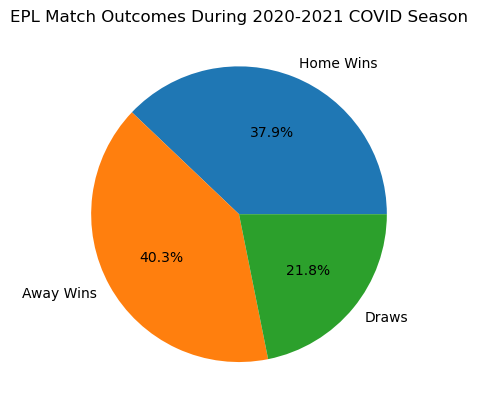

In [13]:
# Calculate % occurance of win/loss/draw
home_win_pct_21 = (144/380)
away_win_pct_21 = (153/380)
draw_pct_21 = (83/380)

# Generate pie chart to display results
labels =  ['Home Wins', 'Away Wins', 'Draws']
values = home_win_pct_21, away_win_pct_21, draw_pct_21 

plt.title("EPL Match Outcomes During 2020-2021 COVID Season")
plt.pie(values, labels=labels ,autopct='%1.1f%%')
plt.show()

In [14]:
sum_df.head()

,Unnamed: 0,Season,League Rank,Squad,# of Players,Avg Age,Avg Poss,MP,W,D,...,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Attendance,Annual Wages ($)
0,0,2017-2018,1,Manchester City,32,26.4,71.0,38,32,4,...,27,79,100,2.63,78.6,23.8,54.8,1.44,54070,184103578.0
1,1,2017-2018,2,Manchester Utd,35,26.7,54.7,38,25,6,...,28,40,81,2.13,55.7,40.7,15.0,0.40,74976,201934520.0
2,2,2017-2018,3,Tottenham,34,25.8,61.8,38,23,8,...,36,38,77,2.03,64.7,33.9,30.8,0.81,67953,97579832.0
3,3,2017-2018,4,Liverpool,34,25.6,60.3,38,21,12,...,38,46,75,1.97,72.9,33.8,39.1,1.03,53049,116263857.0
4,4,2017-2018,5,Chelsea,45,26.7,55.6,38,21,7,...,38,24,70,1.84,54.4,33.8,20.6,0.54,41282,147846240.0


In [15]:
# Groupby team name & get mean for all relevant variables
squads_grouped = sum_df.groupby(['Squad'])

mean_age = squads_grouped['Avg Age'].mean()
mean_wages = squads_grouped['Annual Wages ($)'].mean()
mean_poss = squads_grouped['Avg Poss'].mean()
mean_attendance = squads_grouped['Attendance'].mean()
mean_pts = squads_grouped['Pts'].mean()
mean_GF = squads_grouped['GF'].mean()
mean_GA = squads_grouped['GA'].mean()
mean_xG = squads_grouped['xG'].mean()
mean_xGA = squads_grouped['xGA'].mean()
mean_xGD = squads_grouped['xGD'].mean()
mean_GD = squads_grouped['GD'].mean()

In [16]:
# Create dict to hold variables
mean_EPL_sum ={
    "Age": mean_age,
    "Possession": mean_poss,
    "Attendance": mean_attendance,
    "Points": mean_pts,
    "Goals For": mean_GF,
    "Goals Against": mean_GA,
    "xGoals For": mean_xG,
    "xGoals Against": mean_xGA,
    "Goal Differential": mean_GD,
    "xGoal Differential": mean_xGD,
    "Avg Wages": mean_wages}

# Create new df from dict
mean_EPL_sum_df = pd.DataFrame(mean_EPL_sum)

In [17]:
# Round values to 2 decimal places & display df
mean_EPL_sum_df = mean_EPL_sum_df.round(2)
mean_EPL_sum_df.head()

,Age,Possession,Attendance,Points,Goals For,Goals Against,xGoals For,xGoals Against,Goal Differential,xGoal Differential,Avg Wages
Squad,,,,,,,,,,,
Arsenal,25.92,55.92,45421.60,63.8,63.80,47.40,57.54,49.20,16.40,8.36,1.638060e+08
Aston Villa,25.67,46.37,23570.67,45.0,49.33,55.67,46.93,55.97,-6.33,-9.00,7.483860e+07
Bournemouth,26.23,46.37,9639.33,41.0,47.00,65.33,45.63,59.57,-18.33,-13.93,5.594109e+07
Brentford,25.40,44.80,16918.00,46.0,48.00,56.00,45.80,48.50,-8.00,-2.70,2.567763e+07
Brighton,26.66,48.76,22937.40,41.8,38.00,51.60,42.96,48.62,-13.60,-5.64,5.577839e+07


In [18]:
# Calculate average dollars spent per point earned for each team
dollars_per_point = mean_EPL_sum_df['Avg Wages'] / mean_EPL_sum_df['Points']
print(dollars_per_point)

Squad
Arsenal            2.567492e+06
Aston Villa        1.663080e+06
Bournemouth        1.364417e+06
Brentford          5.582093e+05
Brighton           1.334411e+06
Burnley            1.081443e+06
Cardiff City       1.179122e+06
Chelsea            2.515825e+06
Crystal Palace     2.018530e+06
Everton            2.157494e+06
Fulham             2.319898e+06
Huddersfield       1.392277e+06
Leeds United       6.013015e+05
Leicester City     1.609114e+06
Liverpool          1.725319e+06
Manchester City    1.964331e+06
Manchester Utd     3.223668e+06
Newcastle Utd      1.528341e+06
Norwich City       1.625288e+06
Sheffield Utd      6.986291e+05
Southampton        1.758550e+06
Stoke City         1.806334e+06
Swansea City       1.759235e+06
Tottenham          1.871977e+06
Watford            1.600512e+06
West Brom          2.049720e+06
West Ham           1.759994e+06
Wolves             1.147013e+06
dtype: float64


Text(0, 0.5, 'Wages ($)')

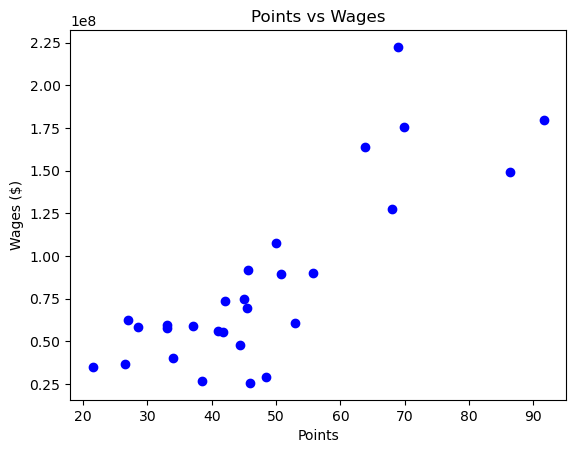

In [19]:
# Plot Points vs Wages
x_axis = mean_EPL_sum_df["Points"]
y_axis = mean_EPL_sum_df["Avg Wages"]

fig1, ax1 = plt.subplots()
plt.title('Points vs Wages')
plt.scatter(x_axis, y_axis,color="b")
plt.xlabel('Points')
plt.ylabel('Wages ($)')

(20.0, 80.0)

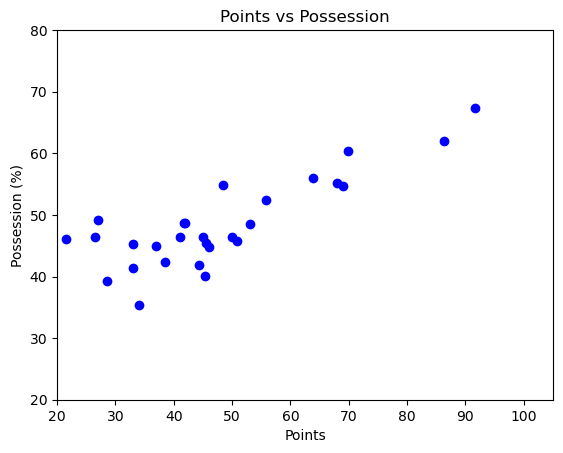

In [20]:
# Plot points vs possession
x_axis = mean_EPL_sum_df["Points"]
y_axis = mean_EPL_sum_df["Possession"]

fig1, ax1 = plt.subplots()
plt.title('Points vs Possession')
plt.scatter(x_axis, y_axis,color="b")
plt.xlabel('Points')
plt.ylabel('Possession (%)')
plt.xlim(20,105)
plt.ylim(20,80)

(20.0, 100.0)

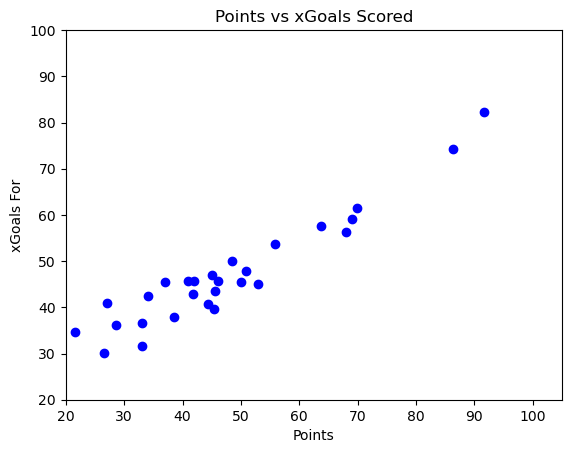

In [21]:
# Plot points vs xGoals Scored
x_axis = mean_EPL_sum_df["Points"]
y_axis = mean_EPL_sum_df["xGoals For"]

fig1, ax1 = plt.subplots()
plt.title('Points vs xGoals Scored')
plt.scatter(x_axis, y_axis,color="b")
plt.xlabel('Points')
plt.ylabel('xGoals For')
plt.xlim(20,105)
plt.ylim(20,100)

(20.0, 100.0)

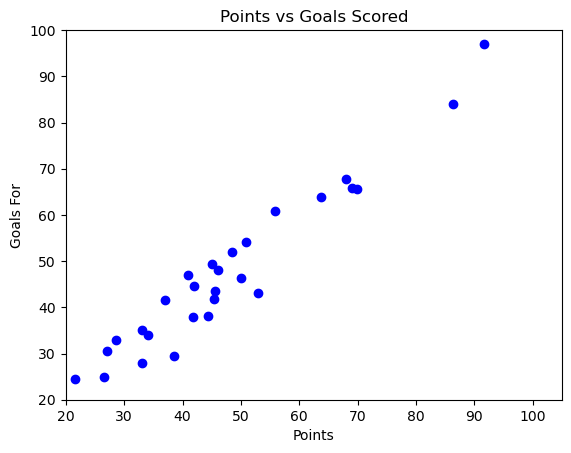

In [22]:
# Plot points vs actual goals scored
x_axis = mean_EPL_sum_df["Points"]
y_axis = mean_EPL_sum_df["Goals For"]

fig1, ax1 = plt.subplots()
plt.title('Points vs Goals Scored')
plt.scatter(x_axis, y_axis,color="b")
plt.xlabel('Points')
plt.ylabel('Goals For')
plt.xlim(20,105)
plt.ylim(20,100)

(20.0, 100.0)

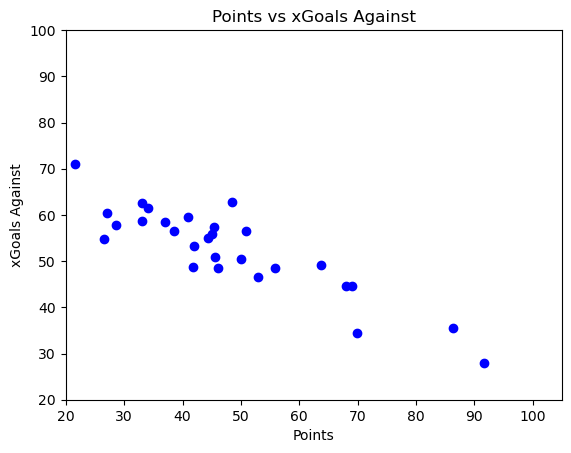

In [23]:
# Plot points vs xGoals Against
x_axis = mean_EPL_sum_df["Points"]
y_axis = mean_EPL_sum_df["xGoals Against"]

fig1, ax1 = plt.subplots()
plt.title('Points vs xGoals Against')
plt.scatter(x_axis, y_axis,color="b")
plt.xlabel('Points')
plt.ylabel('xGoals Against')
plt.xlim(20,105)
plt.ylim(20,100)

(20.0, 100.0)

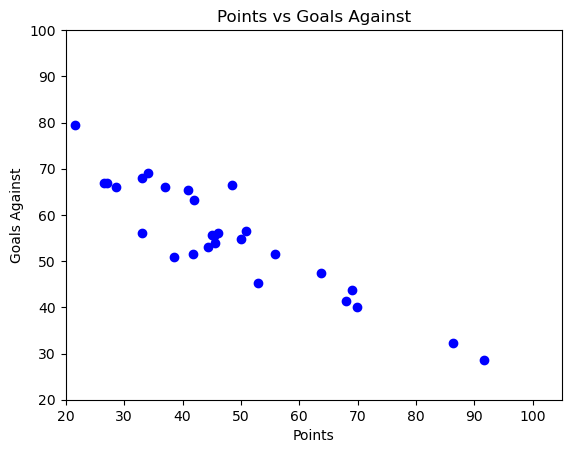

In [24]:
# Plot points vs actual goals against
x_axis = mean_EPL_sum_df["Points"]
y_axis = mean_EPL_sum_df["Goals Against"]

fig1, ax1 = plt.subplots()
plt.title('Points vs Goals Against')
plt.scatter(x_axis, y_axis,color="b")
plt.xlabel('Points')
plt.ylabel('Goals Against')
plt.xlim(20,105)
plt.ylim(20,100)

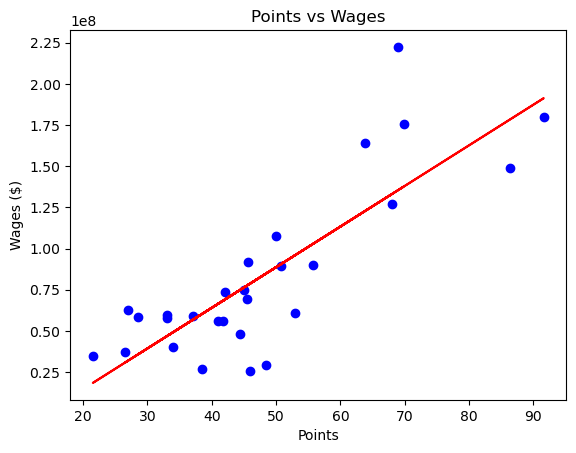

 r^2 = 0.67


In [25]:
# Perform linear regression on each figure
(slope, intercept, rvalue, pvalue, stderr)= linregress(mean_EPL_sum_df["Points"], mean_EPL_sum_df["Avg Wages"])
regress_values= slope* mean_EPL_sum_df["Points"] + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(mean_EPL_sum_df["Points"], mean_EPL_sum_df["Avg Wages"],color='b')
plt.plot(mean_EPL_sum_df["Points"], regress_values, color='r')
plt.annotate(line_eq,(65,36))
plt.xlabel("Points")
plt.ylabel("Wages ($)")
plt.title("Points vs Wages")
plt.show()

print(f" r^2 = {round(rvalue**2,2)}")

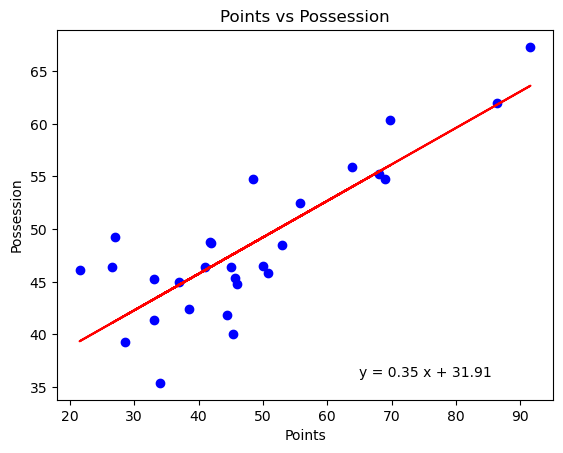

 r^2 = 0.69


In [26]:
# Perform linear regression on each figure
(slope, intercept, rvalue, pvalue, stderr)= linregress(mean_EPL_sum_df["Points"], mean_EPL_sum_df["Possession"])
regress_values= slope* mean_EPL_sum_df["Points"] + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(mean_EPL_sum_df["Points"], mean_EPL_sum_df["Possession"],color='b')
plt.plot(mean_EPL_sum_df["Points"], regress_values, color='r')
plt.annotate(line_eq,(65,36))
plt.xlabel("Points")
plt.ylabel("Possession")
plt.title("Points vs Possession")
plt.show()

print(f" r^2 = {round(rvalue**2,2)}")

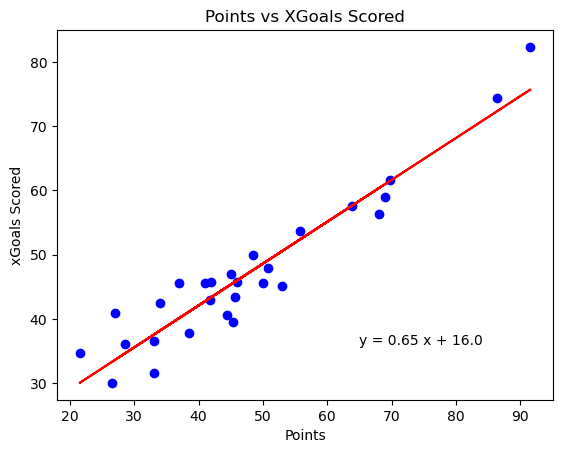

 r^2 = 0.9


In [27]:
# Perform linear regression on each figure
(slope, intercept, rvalue, pvalue, stderr)= linregress(mean_EPL_sum_df["Points"], mean_EPL_sum_df["xGoals For"])
regress_values= slope* mean_EPL_sum_df["Points"] + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(mean_EPL_sum_df["Points"], mean_EPL_sum_df["xGoals For"],color='b')
plt.plot(mean_EPL_sum_df["Points"], regress_values, color='r')
plt.annotate(line_eq,(65,36))
plt.xlabel("Points")
plt.ylabel("xGoals Scored")
plt.title("Points vs XGoals Scored")
plt.show()

print(f" r^2 = {round(rvalue**2,2)}")

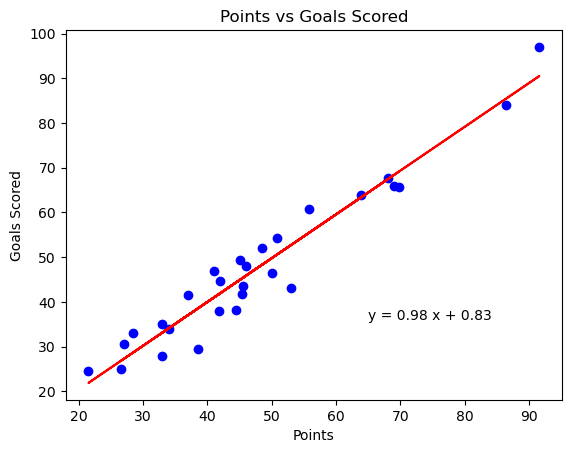

 r^2 = 0.94


In [28]:
# Perform linear regression on each figure
(slope, intercept, rvalue, pvalue, stderr)= linregress(mean_EPL_sum_df["Points"], mean_EPL_sum_df["Goals For"])
regress_values= slope* mean_EPL_sum_df["Points"] + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(mean_EPL_sum_df["Points"], mean_EPL_sum_df["Goals For"],color='b')
plt.plot(mean_EPL_sum_df["Points"], regress_values, color='r')
plt.annotate(line_eq,(65,36))
plt.xlabel("Points")
plt.ylabel("Goals Scored")
plt.title("Points vs Goals Scored")
plt.show()

print(f" r^2 = {round(rvalue**2,2)}")

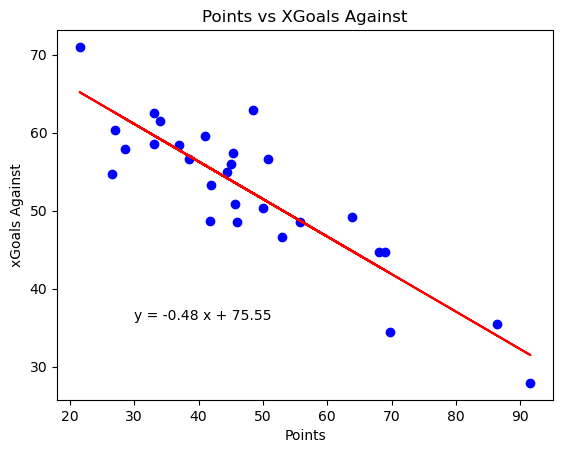

 r^2 = 0.79


In [29]:
# Perform linear regression on each figure
(slope, intercept, rvalue, pvalue, stderr)= linregress(mean_EPL_sum_df["Points"], mean_EPL_sum_df["xGoals Against"])
regress_values= slope* mean_EPL_sum_df["Points"] + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(mean_EPL_sum_df["Points"], mean_EPL_sum_df["xGoals Against"],color='b')
plt.plot(mean_EPL_sum_df["Points"], regress_values, color='r')
plt.annotate(line_eq,(30,36))
plt.xlabel("Points")
plt.ylabel("xGoals Against")
plt.title("Points vs XGoals Against")
plt.show()

print(f" r^2 = {round(rvalue**2,2)}")

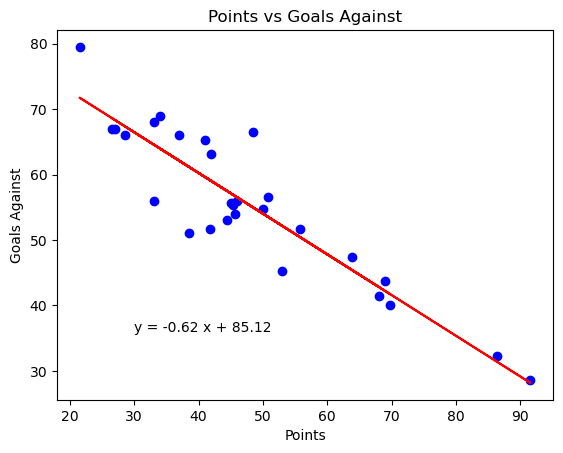

 r^2 = 0.83


In [30]:
# Perform linear regression on each figure
(slope, intercept, rvalue, pvalue, stderr)= linregress(mean_EPL_sum_df["Points"], mean_EPL_sum_df["Goals Against"])
regress_values= slope* mean_EPL_sum_df["Points"] + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(mean_EPL_sum_df["Points"], mean_EPL_sum_df["Goals Against"],color='b')
plt.plot(mean_EPL_sum_df["Points"], regress_values, color='r')
plt.annotate(line_eq,(30,36))
plt.xlabel("Points")
plt.ylabel("Goals Against")
plt.title("Points vs Goals Against")
plt.show()

print(f" r^2 = {round(rvalue**2,2)}")